<a href="https://colab.research.google.com/github/Aergiaaa/Aergiaaa/blob/main/P11_GDGOCAIML_Prediksi_Umur_Kepiting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TODO**:
#Data Loading         [Done] / Muza
#Data Cleaning        [Done] / Sandy Setiawan
#EDA                  [Done] / Renato
#PREP DATA            [Done] / Muza
#Feature Engineering  [Done] / Chentika
#ML Modeling          [Done] / Ghifari
#Model Evaluation     [Done?]
#Presentation (canva) [belum]

# **Data Loading**

In [ ]:
# import data from your localfile
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
uploaded = files.upload()
#Pencet Choose Files setelah itu upload filenya

Mounted at /content/drive


Saving CrabAgePrediction.csv to CrabAgePrediction.csv


In [ ]:
# read data
import pandas as pd
df = pd.read_csv('/content/CrabAgePrediction.csv')
df.head(5)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


# **Data Cleaning**

In [ ]:
# Check for "null" values

df_raw = df.copy()

df_raw.isnull().sum()
for col in df.select_dtypes(include=['float64','number']):
  df_raw[col] = df_raw[col].fillna(df_raw[col].median())

In [ ]:
# Check for "duplicate" values
df_raw.duplicated().sum()
df.drop_duplicates(inplace=True)

# **Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(df_raw.head())

  Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   F  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1   M  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2   I  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3   F  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4   I  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  
0      6.747181    9  
1      1.559222    6  
2      2.764076    6  
3      5.244657   10  
4      1.700970    6  


In [ ]:
print(f"col,row = {df_raw.shape}")

col,row = (3893, 9)


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [ ]:
df_raw.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [ ]:
df_raw.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Weight,0
Shucked Weight,0
Viscera Weight,0
Shell Weight,0
Age,0


In [ ]:
#checking duplicate values
df_raw.nunique()


,0
Sex,3
Length,134
Diameter,111
Height,51
Weight,2343
Shucked Weight,1482
Viscera Weight,867
Shell Weight,907
Age,28


In [ ]:
# Encode kolom kategorikal 'Sex'
# from sklearn.preprocessing import OneHotEncoder
df_encoded = df_raw.copy()
# ohe = OneHotEncoder()

df_encoded = pd.get_dummies(df_encoded, columns=['Sex'], drop_first=False)
df_encoded

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,True,False,False
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,False,False,True
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,False,True,False
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,True,False,False
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8,True,False,False
3889,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,True,False,False
3890,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,False,True,False
3891,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6,False,True,False


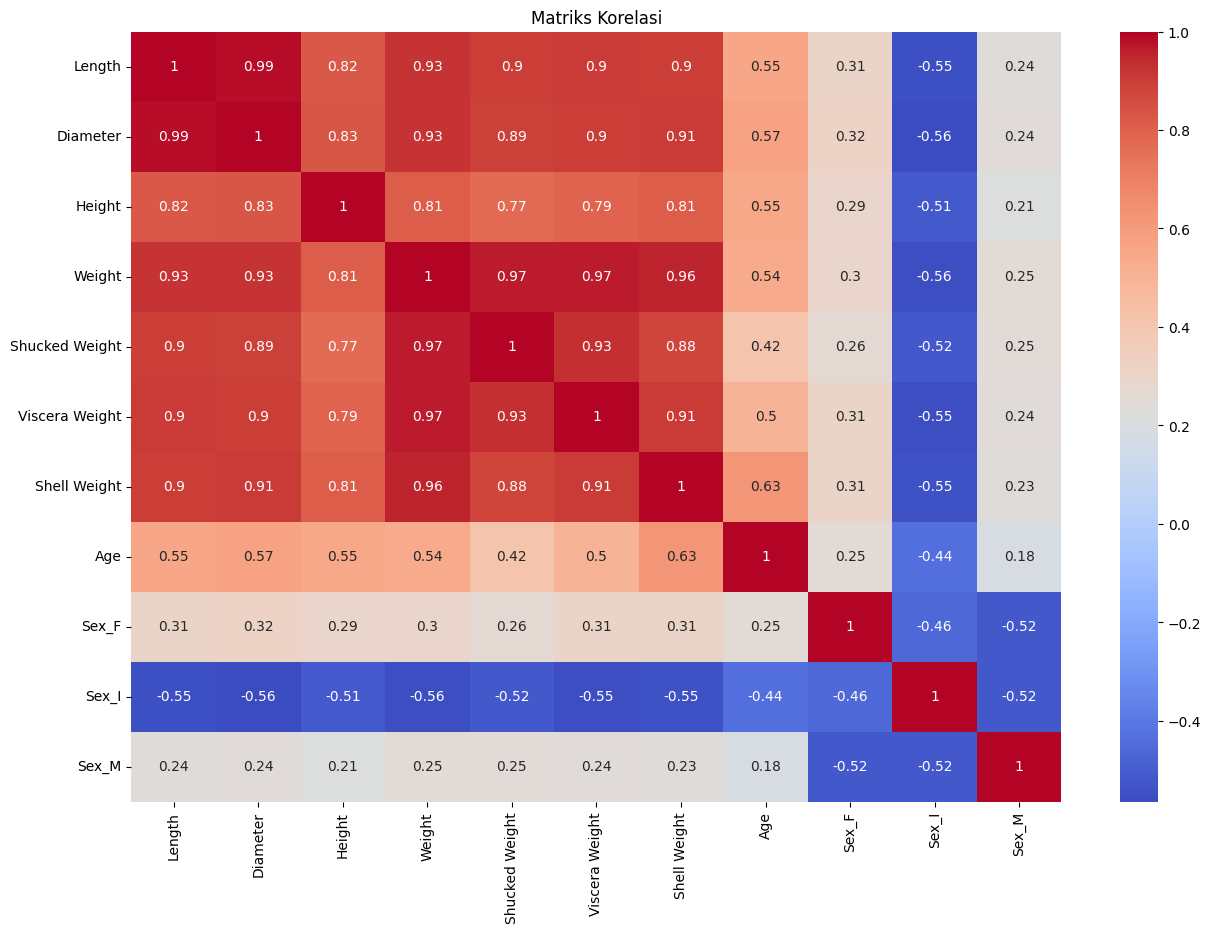

In [ ]:
# Membuat Heatmap untuk korelasi
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

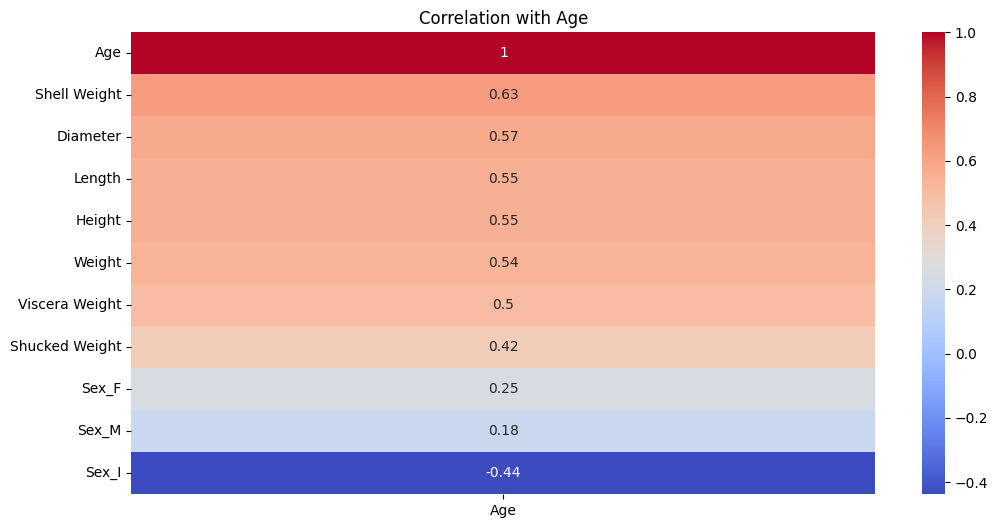

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded.corr()[['Age']].sort_values(by='Age', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Age')
plt.show()


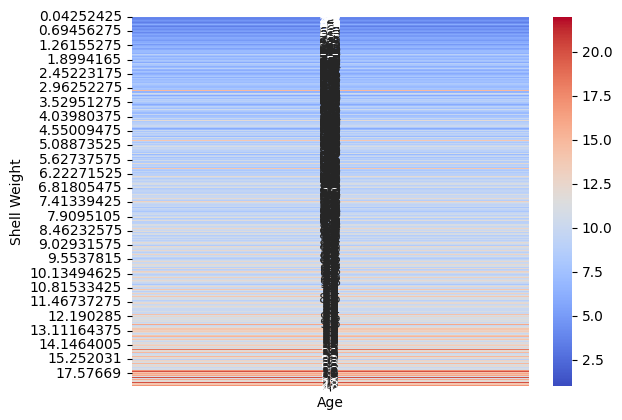

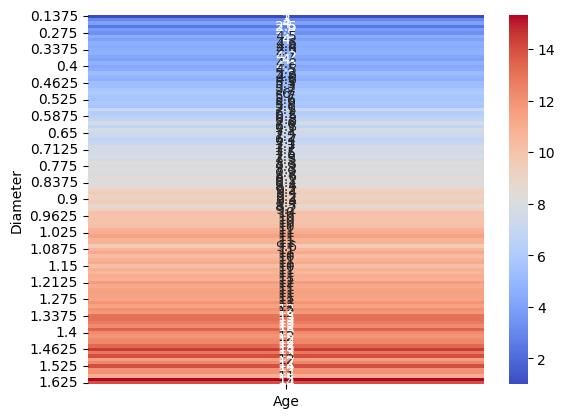

In [ ]:
import seaborn as sns
result = pd.pivot_table(data=df_encoded, index = 'Shell Weight', values = 'Age')
sns.heatmap(result, annot=True, cmap='coolwarm')
plt.show()
result = pd.pivot_table(data=df_encoded, index = 'Diameter', values = 'Age')
sns.heatmap(result, annot=True, cmap='coolwarm')
plt.show()

Length           -0.651111
Diameter         -0.617403
Height            3.314345
Weight            0.518903
Shucked Weight    0.703114
Viscera Weight    0.578290
Shell Weight      0.607716
Age               1.104710
dtype: float64
Length             0.077475
Diameter          -0.040666
Height            80.253588
Weight            -0.023172
Shucked Weight     0.579450
Viscera Weight     0.088392
Shell Weight       0.517478
Age                2.335614
dtype: float64


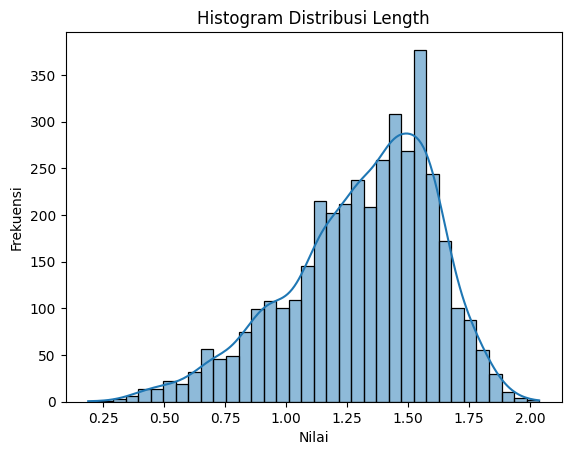

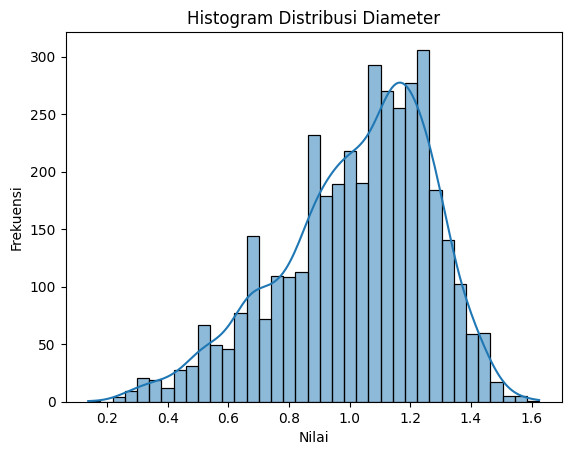

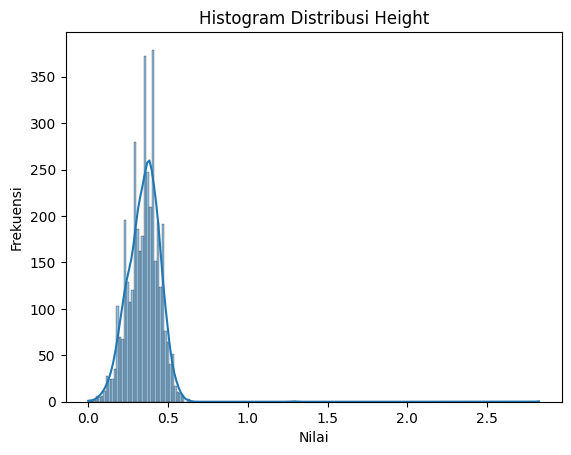

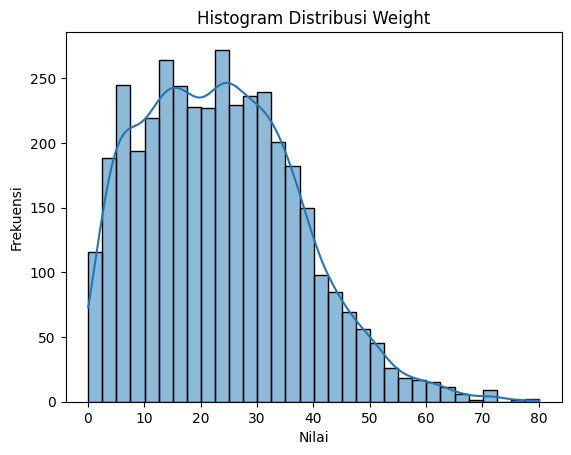

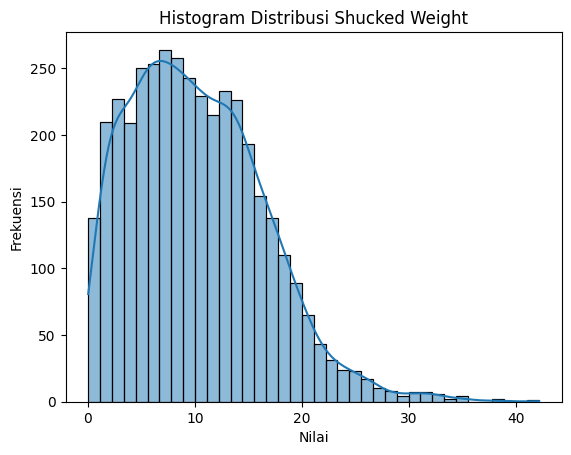

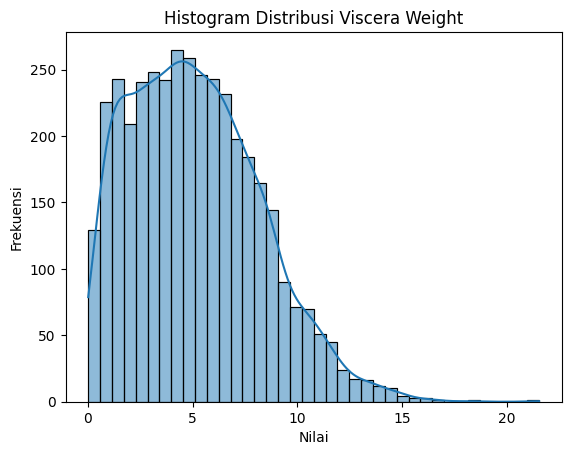

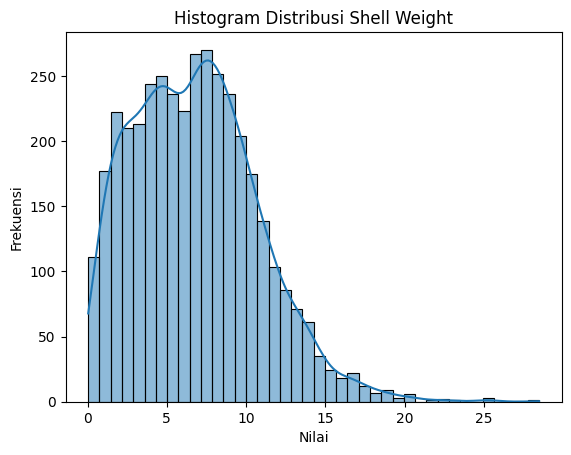

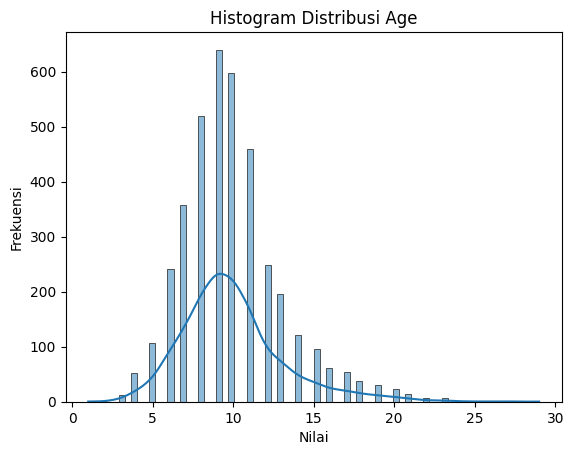

In [ ]:
# Membuat Histogram untuk mencari Skewness

print(df.skew(numeric_only=True))
print(df.kurt(numeric_only=True))

for column in df_encoded.select_dtypes(include=[np.number]):
  sns.histplot(df_encoded[column],kde=True)
  plt.title(f"Histogram Distribusi {column}")
  plt.xlabel("Nilai")
  plt.ylabel("Frekuensi")
  plt.show()

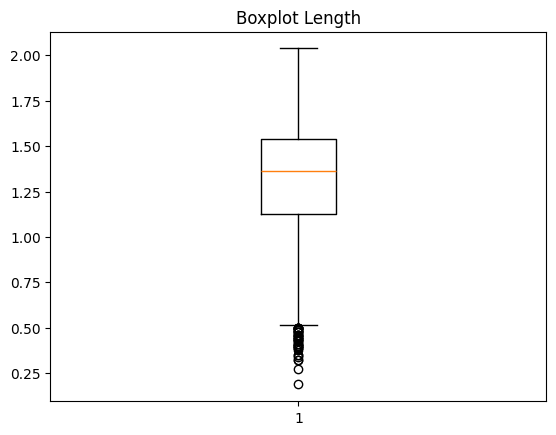

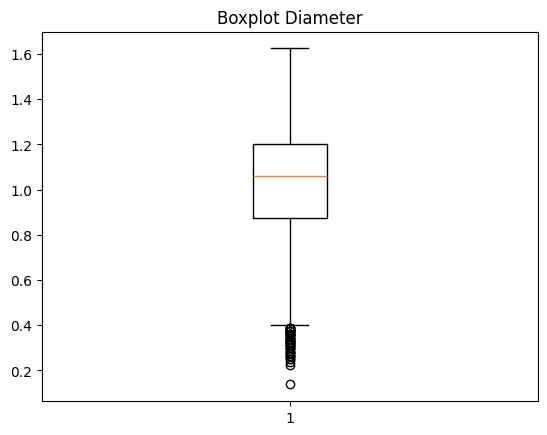

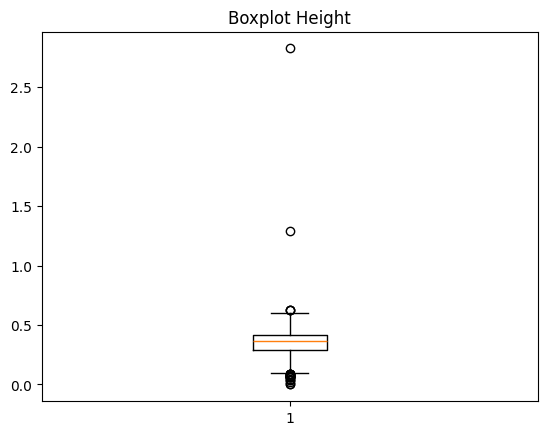

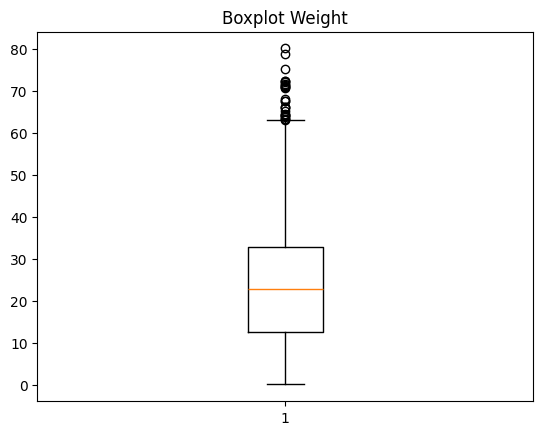

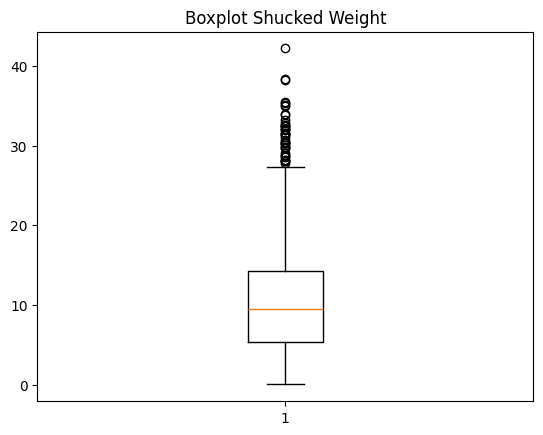

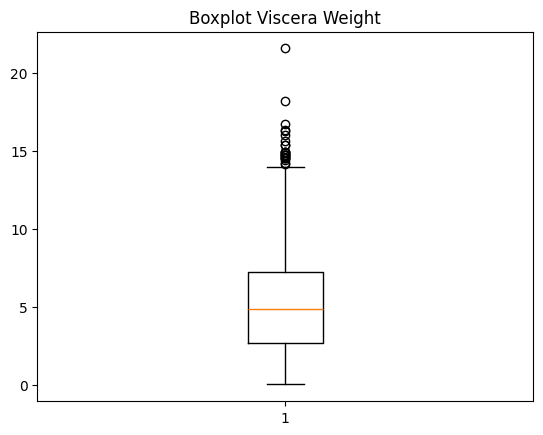

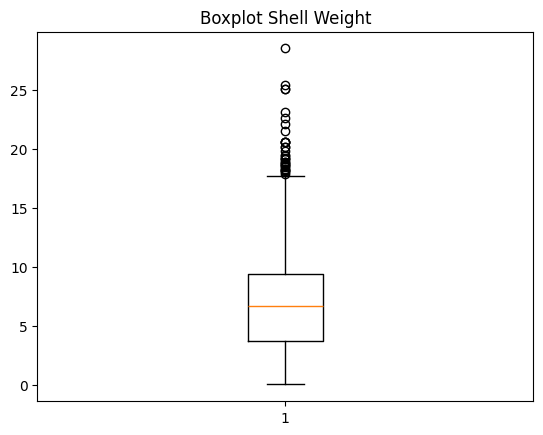

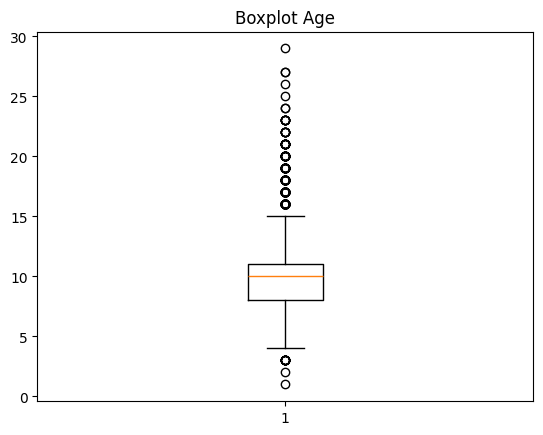

In [ ]:
# Membuat Boxplot untuk mencari outlier
# sex tidak perlu boxplot karena tidak mungkin ada outlier
for column in df_encoded.select_dtypes(include=[np.number]).columns:
  plt.boxplot(df_encoded[column])
  plt.title(f"Boxplot {column}")
  plt.show()

# **Data Preprocessing**

In [ ]:
#Outlier detection using IQR and Z score
#IQR
# Menghitung Q1, Q3, dan IQR
Q1 = df_encoded.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df_encoded.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Mendeteksi outlier
outliers = df_encoded[(df_encoded.select_dtypes(include=[np.number]) < batas_bawah) | (df_encoded.select_dtypes(include=[np.number]) > batas_atas)]

print("Outlier berdasarkan IQR:")
print(outliers.sum())

Outlier berdasarkan IQR:
Length                19.1125
Diameter              18.8125
Height                   7.35
Weight            1854.595941
Shucked Weight    1303.453311
Viscera Weight     370.627188
Shell Weight       671.557131
Age                    4454.0
Sex_F                       0
Sex_I                       0
Sex_M                       0
dtype: object


In [ ]:
# Removing outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_scaled = df_encoded.copy()


feat = ['Diameter','Length','Weight','Height','Shell Weight','Viscera Weight','Shucked Weight']

df_scaled[feat] = scaler.fit_transform(df_scaled[feat])

df_scaled

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0.181818,0.346154,0.4,0.091614,0.312698,0.159375,0.015075,9,True,False,False
1,-1.151515,-1.269231,-1.2,-0.864693,-0.811111,-0.768750,-0.904523,6,False,False,True
2,-0.787879,-0.884615,-0.9,-0.737844,-0.706349,-0.718750,-0.690955,6,False,True,False
3,-0.454545,-0.538462,-0.9,-0.463002,-0.536508,-0.568750,-0.251256,10,True,False,False
4,-1.151515,-1.230769,-1.2,-0.789993,-0.680952,-0.743750,-0.879397,6,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
3888,0.242424,0.230769,-0.3,0.100775,0.236508,0.218750,-0.050251,8,True,False,False
3889,0.454545,0.461538,0.6,0.579986,0.661905,0.509375,0.552764,10,True,False,False
3890,-1.787879,-1.846154,-1.6,-1.033122,-0.982540,-0.956250,-1.067839,5,False,True,False
3891,-0.727273,-0.884615,-0.8,-0.618746,-0.563492,-0.556250,-0.653266,6,False,True,False


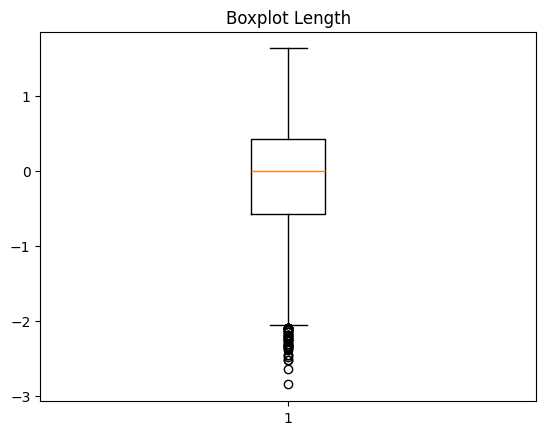

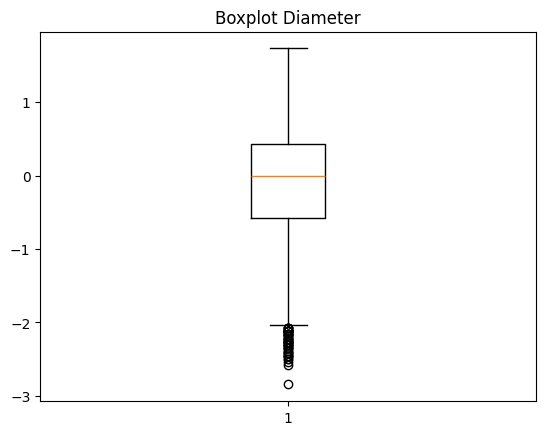

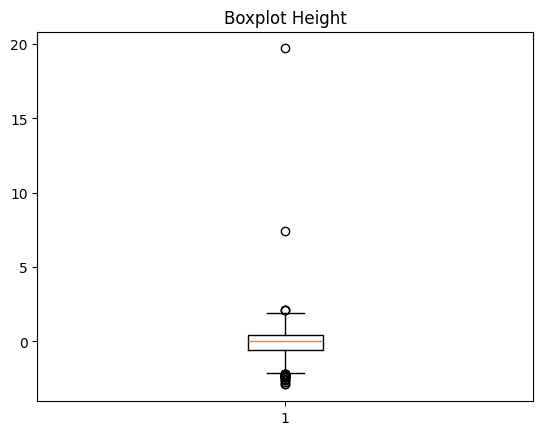

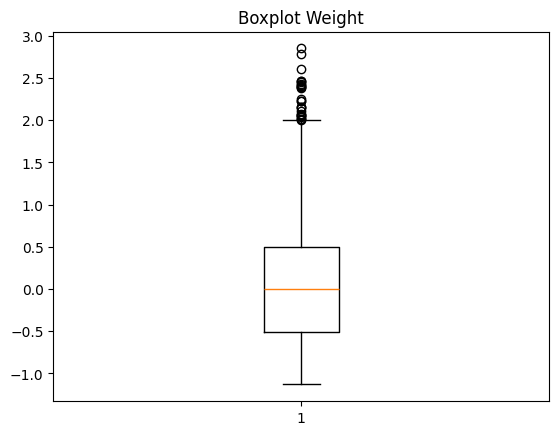

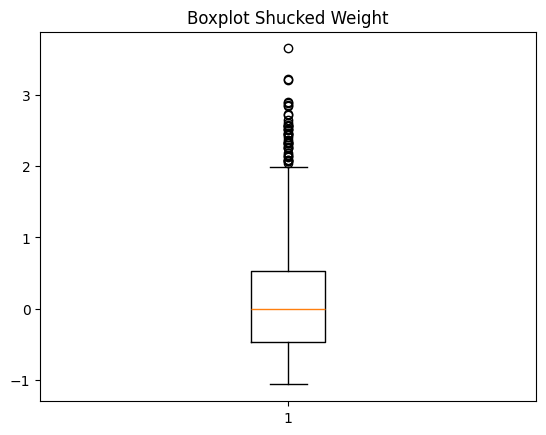

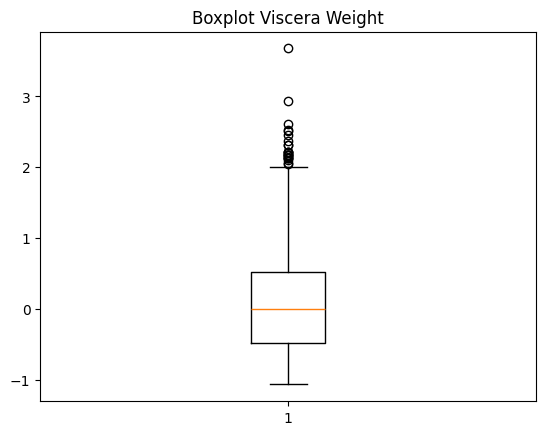

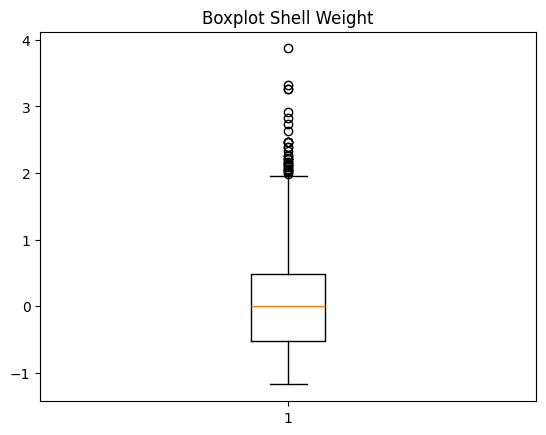

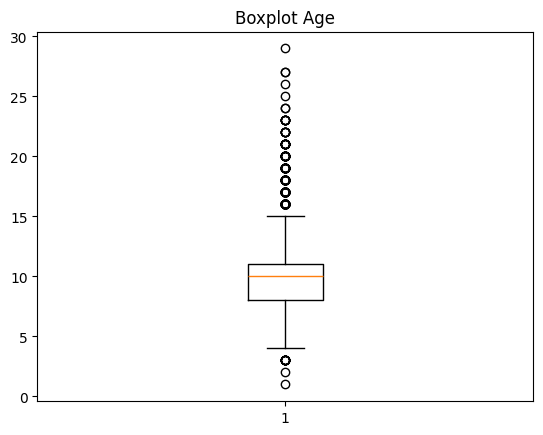

In [ ]:
for column in df_scaled.select_dtypes(include=[np.number]).columns:
  plt.boxplot(df_scaled[column])
  plt.title(f"Boxplot {column}")
  plt.show()

In [ ]:
# #Outlier Handlig using IQR
numeric_cols = df_scaled.select_dtypes(include=np.number).columns.drop('Age')

for col in numeric_cols:
    Q1 = df_scaled[col].quantile(0.25)
    Q3 = df_scaled[col].quantile(0.75)
    IQR = Q3 - Q1

    # Batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Indeks outlier
    outlier_index = (df_scaled[col] < lower_bound) | (df_scaled[col] > upper_bound)

    # Pengganti outlier (mean/median)
    replacement_value = df_scaled[col].median()

    # Imputasi
    df_scaled.loc[outlier_index, col] = replacement_value

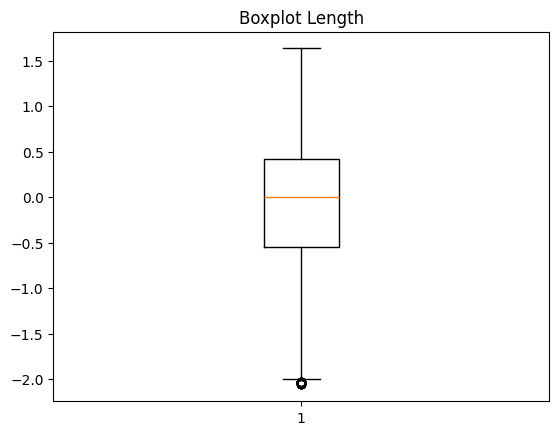

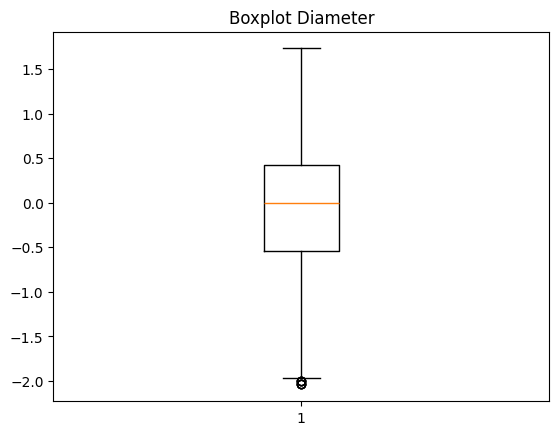

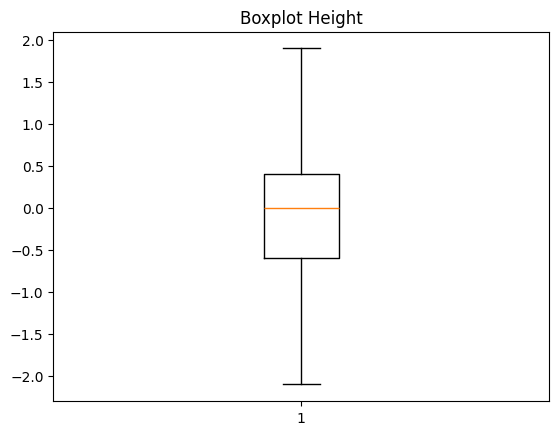

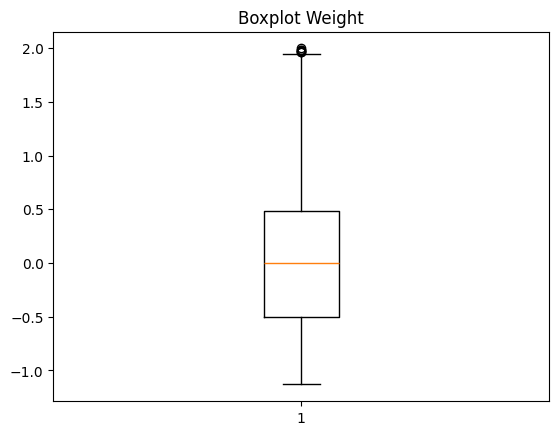

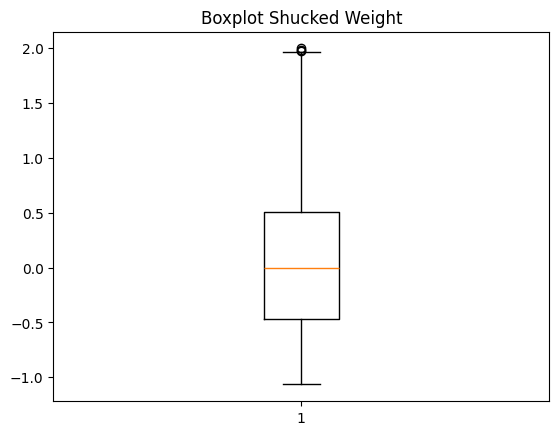

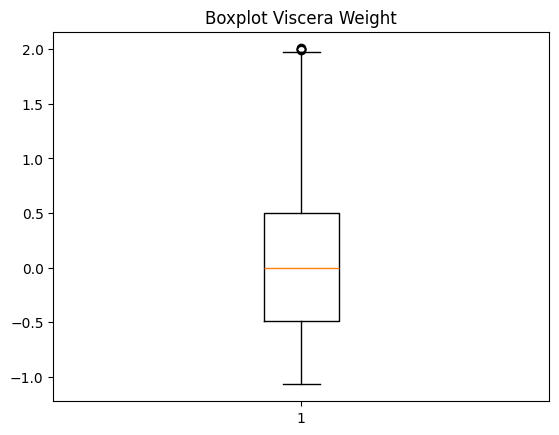

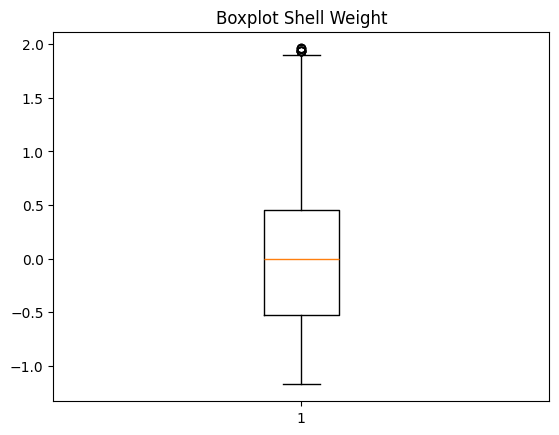

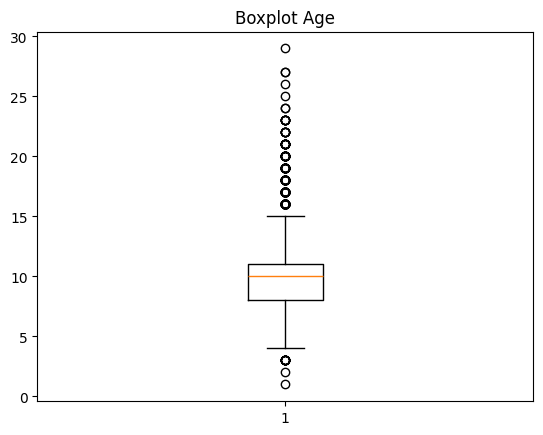

In [ ]:
for column in df_scaled.select_dtypes(include=[np.number]).columns:
  plt.boxplot(df_scaled[column])
  plt.title(f"Boxplot {column}")
  plt.show()

In [ ]:
df_scaled.skew(numeric_only=True)
df_scaled.kurt(numeric_only=True)

,0
Length,-0.237524
Diameter,-0.336843
Height,-0.343710
Weight,-0.454990
Shucked Weight,-0.438862
Viscera Weight,-0.418749
Shell Weight,-0.427695
Age,2.335614
Sex_F,-1.363105
Sex_I,-1.379356


# **Feature Engineering (FE)**

In [ ]:
import pandas as pd

df_fe = df_scaled.copy()

# Tampilkan hasil
print(df_fe.head())

     Length  Diameter  Height    Weight  Shucked Weight  Viscera Weight  \
0  0.181818  0.346154     0.4  0.091614        0.312698        0.159375   
1 -1.151515 -1.269231    -1.2 -0.864693       -0.811111       -0.768750   
2 -0.787879 -0.884615    -0.9 -0.737844       -0.706349       -0.718750   
3 -0.454545 -0.538462    -0.9 -0.463002       -0.536508       -0.568750   
4 -1.151515 -1.230769    -1.2 -0.789993       -0.680952       -0.743750   

   Shell Weight  Age  Sex_F  Sex_I  Sex_M  
0      0.015075    9   True  False  False  
1     -0.904523    6  False  False   True  
2     -0.690955    6  False   True  False  
3     -0.251256   10   True  False  False  
4     -0.879397    6  False   True  False  


Top correlated features:
 Age               1.000000
Shell Weight      0.605867
Height            0.591787
Weight            0.539642
Diameter          0.525310
Length            0.515400
Viscera Weight    0.505154
Shucked Weight    0.430282
Sex_F             0.249282
Sex_M             0.182339
Name: Age, dtype: float64


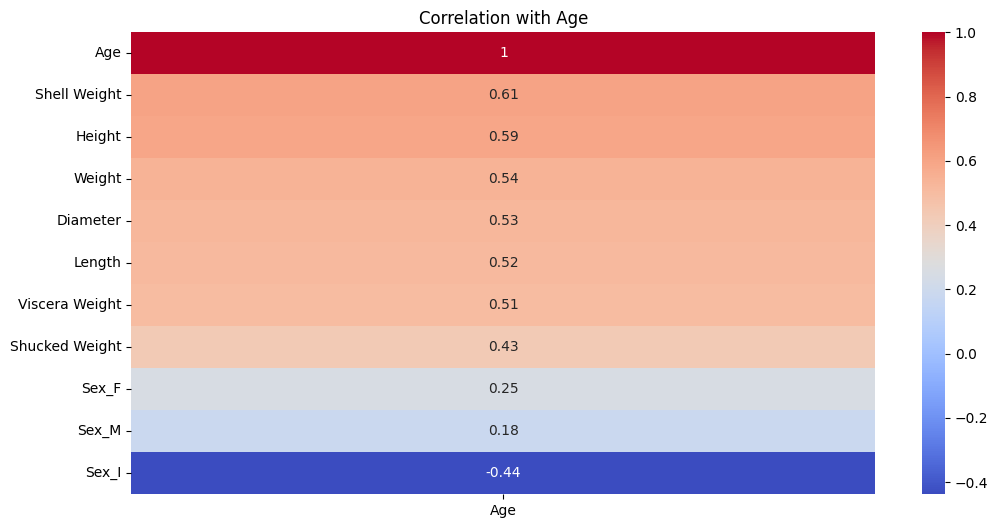

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung korelasi terhadap 'Age'
corr = df_fe.corr()['Age'].sort_values(ascending=False)

# Tampilkan 10 fitur teratas
print("Top correlated features:\n", corr.head(10))

# Heatmap korelasi (optional)
plt.figure(figsize=(12, 6))
sns.heatmap(df_fe.corr()[['Age']].sort_values(by='Age', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Age')
plt.show()

In [ ]:
# # Total Weight
# df_fe['Total_Weight'] = df_fe['Weight'] + df_fe['Shucked Weight'] + df_fe['Viscera Weight'] + df_fe['Shell Weight']

# # Average Dimension
# df_fe['Average_Dimension'] = (df_fe['Length'] + df_fe['Diameter'] + df_fe['Height']) / 3

# # Shell Proportion
# df_fe['Shell_Proportion'] = df_fe['Shell Weight'] / df_fe['Total_Weight']

# # Meat Proportion
# df_fe['Meat_Proportion'] = df_fe['Shucked Weight'] / df_fe['Total_Weight']

# # Viscera Proportion
# df_fe['Viscera_Proportion'] = df_fe['Viscera Weight'] / df_fe['Total_Weight']

# print(df_fe.head()) # Menampilkan 5 baris pertama dari df_fe untuk melihat fitur baru

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Scatter plot untuk melihat hubungan fitur agregasi dengan Age
# features_to_plot = ['Total_Weight', 'Average_Dimension', 'Shell_Proportion', 'Meat_Proportion', 'Viscera_Proportion']

# for feature in features_to_plot:
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=df_fe[feature], y=df_fe['Age'])
#     plt.title(f'Scatter Plot: {feature} vs Age')
#     plt.xlabel(feature)
#     plt.ylabel('Age')
#     plt.show()

# # Histogram untuk melihat distribusi fitur agregasi
# for feature in features_to_plot:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(df_fe[feature], bins=20, kde=True)
#     plt.title(f'Histogram: {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Frequency')
#     plt.show()

# **ML Modeling**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Asumsi df sudah ada dari EDA sebelumnya
X = df.drop('Age', axis=1)
y = df['Age']

# Encode 'Sex' secara manual
X['Sex'] = X['Sex'].map({'F':0, 'M':1, 'I':2})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# menggunakan random forest
model = RandomForestRegressor(
    n_estimators=60,
    max_depth=6,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1            # Gunakan semua core CPU
)

# Training
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} bulan")
print(f"R²-Score: {r2:.2f} (Akurasi: {r2*100:.0f}%)")
print(f"R²-Score: {r2:.2f} (Akurasi: {r2*100:.0f}%)")

MAE: 1.50 bulan
R²-Score: 0.52 (Akurasi: 52%)
R²-Score: 0.52 (Akurasi: 52%)


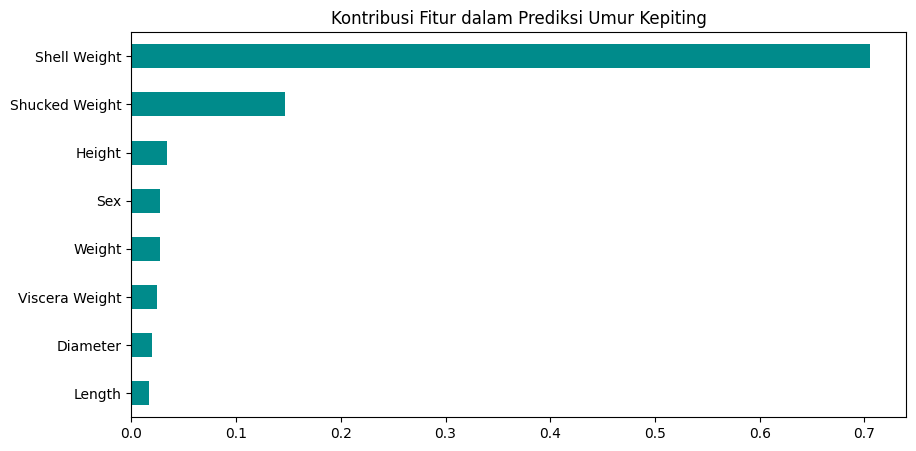

In [ ]:
import matplotlib.pyplot as plt

# Hitung importance
importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values()

# Plot
plt.figure(figsize=(10,5))
importance.plot(kind='barh', color='darkcyan')
plt.title('Kontribusi Fitur dalam Prediksi Umur Kepiting')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"R² Cross-Validation: {cv_scores.mean():.2f} (±{cv_scores.std():.2f})")

R² Cross-Validation: 0.53 (±0.04)


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"R² Cross-Validation: {cv_scores.mean():.2f} (±{cv_scores.std():.2f})")

R² Cross-Validation: 0.53 (±0.04)


In [ ]:
sample_data = pd.DataFrame({
    'Sex': [1],           # M=1
    'Length': [1.3],
    'Diameter': [1.0],
    'Height': [0.3],
    'Weight': [25.0],
    'Shucked Weight': [12.0],
    'Viscera Weight': [6.0],
    'Shell Weight': [7.0]
}, index=[0])

predicted_age = model.predict(sample_data)[0]
print(f"Prediksi Umur Kepiting: {predicted_age:.1f} bulan")

Prediksi Umur Kepiting: 9.0 bulan


# **Model Evaluation**

Text(0.5, 1.0, 'Akurasi Prediksi Model')

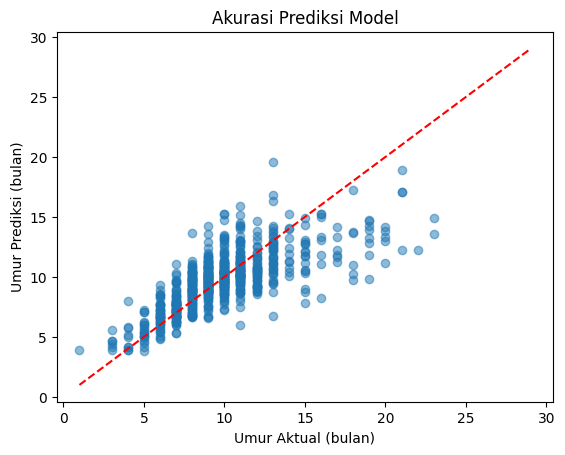

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Umur Aktual (bulan)')
plt.ylabel('Umur Prediksi (bulan)')
plt.title('Akurasi Prediksi Model')

Text(0.5, 1.0, 'Distribusi Kesalahan Prediksi')

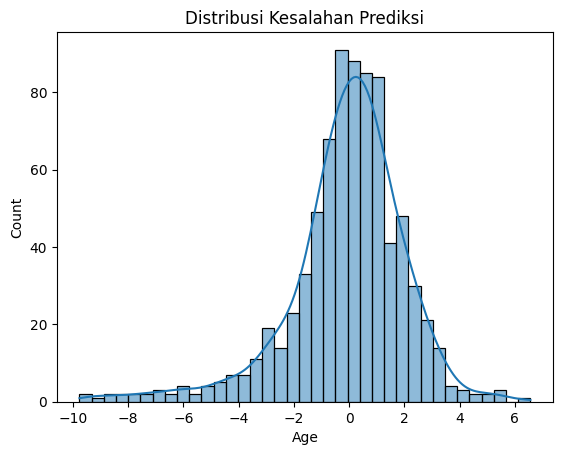

In [ ]:
error = y_pred - y_test
sns.histplot(error, kde=True)
plt.title('Distribusi Kesalahan Prediksi')

Mean Squared Error (MSE): 4.496479034423828
Mean Absolute Error (MAE): 1.4951215982437134
R-squared (R2): 0.5320778489112854


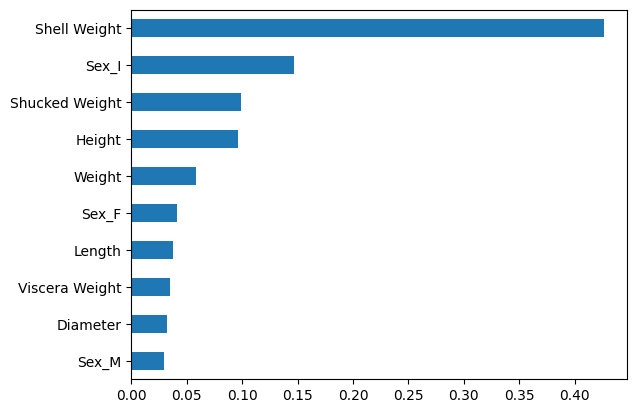

In [ ]:
importances = model.feature_importances_
features = X_train.columns
pd.Series(importances, index=features).sort_values().plot(kind='barh')


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("MAE Cross-Validation:", -scores.mean())

MAE Cross-Validation: 1.5924772024154663


kesimpulan dari abang gemini:

  Okay, let's interpret the results you got:

MSE (Mean Squared Error) = 2.86: This represents the average squared difference between your model's predictions and the actual values. A lower MSE is better, but its scale depends on the data, so it's hard to say if 2.86 is inherently "good" without context.

MAE (Mean Absolute Error) = 1.29: This represents the average absolute difference between predictions and actual values. In your case, this means the model's predictions are off by about 1.29 units (presumably months in this age prediction task). Whether this is acceptable depends on the specific application. If predicting age within a year or two is okay, then this might be considered a decent result.

R-squared (R^2) = 0.48: This indicates the proportion of variance in the target variable (age) that is explained by the model. An R^2 of 0.48 means your model explains about 48% of the variability in age. This is a moderate value; it suggests the model captures some patterns but still leaves a significant amount of unexplained variation.

Is it nice accuracy?

It depends on your specific goals and expectations. Here's a breakdown:

Moderate Accuracy: The values suggest a model with moderate predictive power. It's not extremely accurate, but it's doing better than random guessing.

Application Context: Consider the implications of an error of 1.29 months in your use case. Is this level of error acceptable, or does it need to be lower?

Potential for Improvement: There's room for improvement as the R^2 is not very high.

You could try:
Feature Engineering: Explore creating new features or transforming existing ones to better capture the relationship with age.
Hyperparameter Tuning: Experiment with different settings for your XGBoost model to find optimal values.

Trying Different Models: Consider evaluating other regression models (like Random Forest, Support Vector Regression) to see if they perform better.


In summary: **Your model has some predictive ability, but it might not be considered "nice" if high accuracy is crucial. Further investigation and optimization are likely needed. I recommend focusing on understanding your data better, refining features, and exploring model options to enhance performance.**